In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/age_education.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool


Standardize numeric variable, age

In [3]:
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

Kprototypes from the kmodes module

In [7]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [8]:
#kmodes expects Numpy matrices rather than panda dataframes, so convert as a matrix in the X variable by using the values function
X = df[['z_age', 'education']].values

In [10]:
#perform k-prototypes with 3 clusters, specifying that education is categorical
kp = KPrototypes(n_clusters=3)
df['cluster'] = kp.fit_predict(X, categorical=[1]) #save the result of the clustering as a new column called cluster

In [11]:
df.head()

,age,education,z_age,cluster
0,27.007219,college,-1.446258,2
1,47.615409,highschool,0.438698,1
2,51.382815,highschool,0.783290,1
3,54.906622,highschool,1.105599,1
4,27.719939,less_than_highschool,-1.381068,2


In [13]:
#create dummy variables for categorical variable using pandas get_dummies function
#concatenate onto df for analyzing results

df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
df.head()

,age,education,z_age,cluster,college,highschool,less_than_highschool,college,highschool,less_than_highschool
0,27.007219,college,-1.446258,2,1,0,0,1,0,0
1,47.615409,highschool,0.438698,1,0,1,0,0,1,0
2,51.382815,highschool,0.783290,1,0,1,0,0,1,0
3,54.906622,highschool,1.105599,1,0,1,0,0,1,0
4,27.719939,less_than_highschool,-1.381068,2,0,0,1,0,0,1


Export to Excel

In [19]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/exercise17clusters.csv')

Plot Data

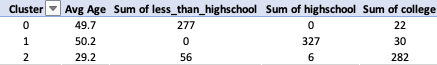

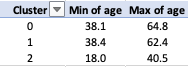

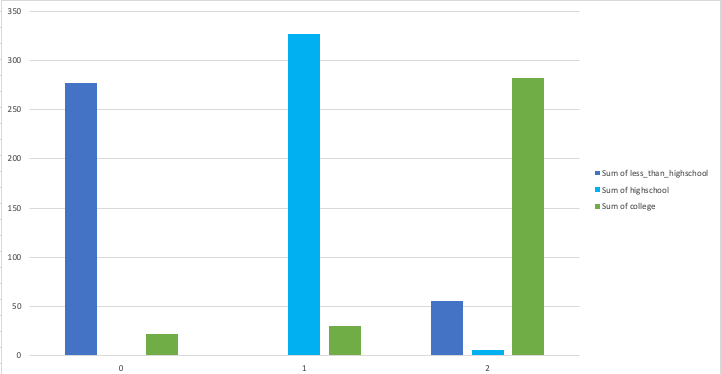

Cluster characteristics and observations: 


*   Cluster 0 - majority less than high school, older avg age
*   Cluster 1 - majority high school, older avg age
* Cluster 2 - majority college, younger avg age

